# Coll Disease Classifier

In [1]:
#import libraries
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

In [2]:
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/drive-download-20221021T071708Z-001.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [3]:
train_data_path = "/content/train"
validation_data_path = "/content/val"

In [4]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [5]:
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')
training_data = training_datagen.flow_from_directory(train_data_path, # this is the target directory
                                      target_size=(150, 150), # all images will be resized to 150x150
                                      batch_size=32,
                                      class_mode='binary')
valid_datagen = ImageDataGenerator(rescale=1./255)
# this is a similar generator, for validation data
valid_data = valid_datagen.flow_from_directory(validation_data_path,
                                  target_size=(150,150),
                                  batch_size=32,
                                  class_mode='binary')

Found 1951 images belonging to 4 classes.
Found 324 images belonging to 4 classes.


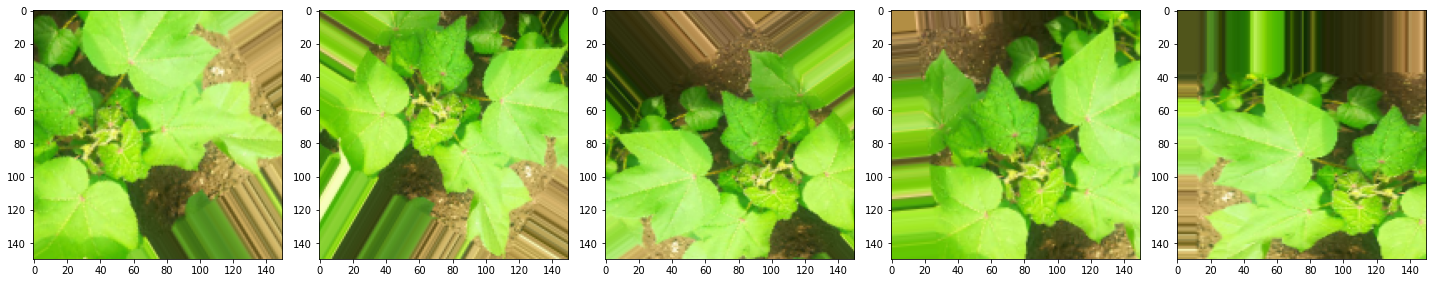

In [6]:
images = [training_data[0][0][0]for i in range(5)]
plotImages(images)

In [7]:
model_path = '/content/drive/My Drive//v3_red_cott_dis.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [8]:
#Building cnn model
cnn_model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=[150, 150, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=64, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),                                    
                                    keras.layers.Conv2D(filters=256, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
 
                                    keras.layers.Dropout(0.5),                                                                        
                                    keras.layers.Flatten(), # neural network beulding
                                    keras.layers.Dense(units=128, activation='relu'), # input layers
                                    keras.layers.Dropout(0.1),                                    
                                    keras.layers.Dense(units=256, activation='relu'),                                    
                                    keras.layers.Dropout(0.25),                                    
                                    keras.layers.Dense(units=4, activation='softmax') # output layer
])

In [9]:
# compile cnn model
cnn_model.compile(optimizer = Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [10]:
# train cnn model
history = cnn_model.fit(training_data, 
                          epochs=200, 
                          verbose=1, 
                          validation_data= valid_data,
                          callbacks=callbacks_list)

Epoch 1/200
61/61 [==============================] - ETA: 0s - loss: 1.2212 - accuracy: 0.4603
Epoch 1: val_accuracy improved from -inf to 0.33642, saving model to /content/drive/My Drive/v3_red_cott_dis.h5
61/61 [==============================] - 39s 489ms/step - loss: 1.2212 - accuracy: 0.4603 - val_loss: 1.3522 - val_accuracy: 0.3364
Epoch 2/200
61/61 [==============================] - ETA: 0s - loss: 1.0191 - accuracy: 0.5761
Epoch 2: val_accuracy improved from 0.33642 to 0.59877, saving model to /content/drive/My Drive/v3_red_cott_dis.h5
61/61 [==============================] - 23s 378ms/step - loss: 1.0191 - accuracy: 0.5761 - val_loss: 0.9097 - val_accuracy: 0.5988
Epoch 3/200
61/61 [==============================] - ETA: 0s - loss: 0.9197 - accuracy: 0.6320
Epoch 3: val_accuracy improved from 0.59877 to 0.68827, saving model to /content/drive/My Drive/v3_red_cott_dis.h5
61/61 [==============================] - 24s 392ms/step - loss: 0.9197 - accuracy: 0.6320 - val_loss: 0.7924 

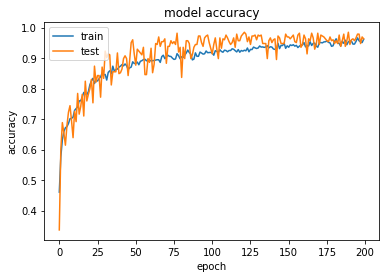

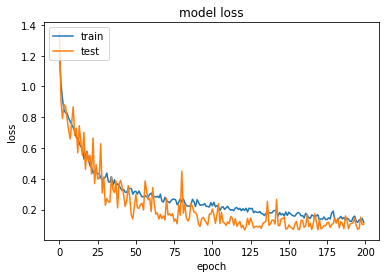

{'loss': [1.2211883068084717,
  1.0191224813461304,
  0.9196813702583313,
  0.8473248481750488,
  0.8280414938926697,
  0.8266934752464294,
  0.7941054105758667,
  0.7742236852645874,
  0.7526806592941284,
  0.7340626120567322,
  0.7089592218399048,
  0.6692240238189697,
  0.6653318405151367,
  0.63282710313797,
  0.6089282631874084,
  0.5984306335449219,
  0.5288758873939514,
  0.5536626577377319,
  0.5787685513496399,
  0.5228054523468018,
  0.48453259468078613,
  0.47612905502319336,
  0.43770766258239746,
  0.4544554054737091,
  0.44111543893814087,
  0.43405669927597046,
  0.43300411105155945,
  0.4085242450237274,
  0.3930101692676544,
  0.4048614501953125,
  0.4091595411300659,
  0.4375711977481842,
  0.3813745379447937,
  0.37748804688453674,
  0.41447335481643677,
  0.3581233322620392,
  0.3938339352607727,
  0.35485604405403137,
  0.36692148447036743,
  0.35837826132774353,
  0.3375003933906555,
  0.3256198465824127,
  0.3306959867477417,
  0.312619686126709,
  0.312599837779

In [11]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
 
history.history